## Customers Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_csv('../data/customers.csv')
orders_df = pd.read_csv('../data/orders_with_payment.csv')

print("Customers DataFrame:")
display(customers_df.head())

print("\nOrders DataFrame:")
display(orders_df.head())

Customers DataFrame:


,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia



Orders DataFrame:


,order_id,customer_id,order_date,delivery_date,delivery_time,payment
0,1,64,2021-08-30,2021-09-24,25 days,1487.0
1,2,473,2021-02-03,2021-02-13,10 days,1130.0
2,3,774,2021-10-08,2021-11-03,26 days,508.0
3,4,433,2021-05-06,2021-05-19,13 days,976.0
4,5,441,2021-03-23,2021-03-24,1 days,2043.0


### Yaş – Harcama Analizi

In [2]:
# Yas gruplarina gore harcama tutarlari hesapliyoruz.

# Ilk olarak customers ve orders df'lerini merge ettik.
# Merge the two dataframes on 'customer_id'
merged_df = pd.merge(customers_df, orders_df, on='customer_id')

# Ikinci asamada merge ettigimiz df uzerinden group by islemi uyguladik. 'Age' sutununa gore gruplayip toplam paymentlarini hesapladik.
# Group by age and sum the payments
age_spending = merged_df.groupby('age')['payment'].sum().reset_index()

# Sort by payment in descending order
age_spending = age_spending.sort_values(by='payment', ascending=False)

print("Total spending by age group:")
display(age_spending)

Total spending by age group:


,age,payment
37,57,36950.0
12,32,30371.0
18,38,28942.0
55,75,28309.0
14,34,27105.0
...,...,...
9,29,8326.0
57,77,8061.0
13,33,7428.0
52,72,7192.0


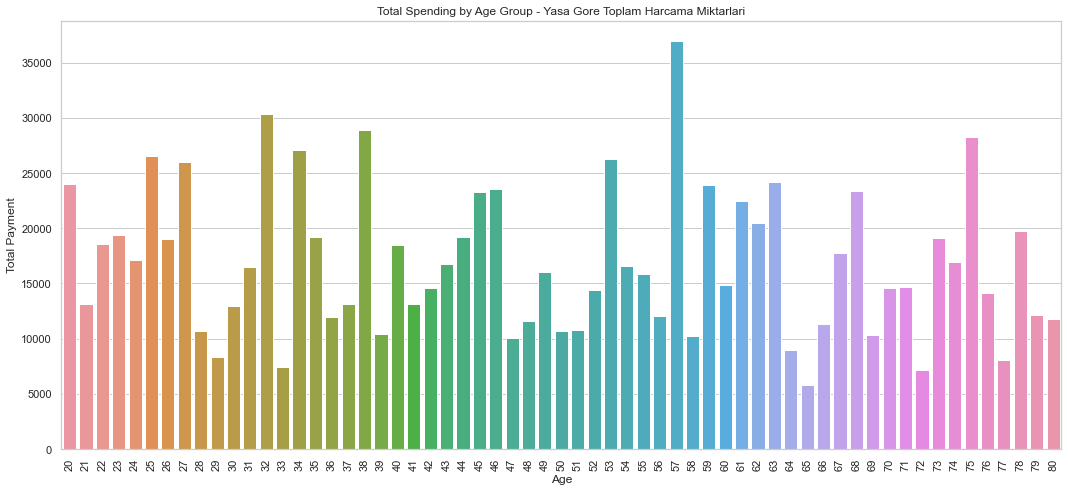

In [3]:
# Yasa gore toplam harcamalari grafik ile gorsellestiriyoruz.

# Set the style for the plot
sns.set_theme(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='age', y='payment', data=age_spending)
plt.title('Total Spending by Age Group - Yasa Gore Toplam Harcama Miktarlari')
plt.xlabel('Age')
plt.ylabel('Total Payment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
# En cok harcama yapan ilk 10 yas grubu
print("Top 10 Age Groups by Total Spending:")
display(age_spending.head(10))

Top 10 Age Groups by Total Spending:


,age,payment
37,57,36950.0
12,32,30371.0
18,38,28942.0
55,75,28309.0
14,34,27105.0
5,25,26506.0
33,53,26246.0
7,27,26027.0
43,63,24228.0
0,20,24036.0


### Müşteri Başına Ortalama Gelir -  Average Revenue per Customer (ARPC) 

In [5]:
# Calculate total revenue
total_revenue = merged_df['payment'].sum()

# Calculate total number of unique customers
total_unique_customers = customers_df['customer_id'].nunique()

# Calculate Average Revenue per Customer (ARPC)
arpc = total_revenue / total_unique_customers

print(f"Toplam Gelir: {total_revenue:.2f}")
print(f"Toplam Benzersiz Müşteri Sayısı: {total_unique_customers}")
print(f"Müşteri Başına Ortalama Gelir - Average Revenue per Customer (ARPC): {arpc:.2f}")

Toplam Gelir: 1031800.00
Toplam Benzersiz Müşteri Sayısı: 1000
Müşteri Başına Ortalama Gelir - Average Revenue per Customer (ARPC): 1031.80


### Musteri Yasam Boyu Degeri - Customer Lifetime Value (CLV / CLTV)

In [6]:
sales_df = pd.read_csv('../data/sales.csv')
# Her müşteri için toplam harcama
# We need to merge sales_df with orders_df to link sales to customers
# Then group by customer_id and sum the total_price
merged_sales_orders = pd.merge(orders_df, sales_df, on='order_id')
customer_revenue = merged_sales_orders.groupby('customer_id')['total_price'].sum().reset_index()
customer_revenue = customer_revenue.rename(columns={'total_price': 'total_customer_revenue'})

print("Her Müşteri İçin Toplam Harcama:")
display(customer_revenue.head())

Her Müşteri İçin Toplam Harcama:


,customer_id,total_customer_revenue
0,1,1641
1,7,1017
2,10,270
3,11,382
4,12,1551


In [7]:
# Her müşteri için toplam sipariş sayısı
# We can group the orders_df by customer_id and count the unique order_ids
customer_orders = orders_df.groupby('customer_id')['order_id'].nunique().reset_index()
customer_orders = customer_orders.rename(columns={'order_id': 'total_orders'})

print("\nHer Müşteri İçin Toplam Sipariş Sayısı:")
display(customer_orders.head())


Her Müşteri İçin Toplam Sipariş Sayısı:


,customer_id,total_orders
0,1,3
1,7,1
2,10,1
3,11,1
4,12,1


In [8]:
# Merge customer_revenue and customer_orders DataFrames
customer_clv_data = pd.merge(customer_revenue, customer_orders, on='customer_id')

# Ortalama sipariş değeri (her müşteri için)
customer_clv_data['average_order_value'] = customer_clv_data['total_customer_revenue'] / customer_clv_data['total_orders']

# Her müşteri için ilk ve son sipariş tarihlerini bulma
customer_timeline = orders_df.groupby('customer_id')['order_date'].agg(['min', 'max']).reset_index()
customer_timeline.columns = ['customer_id', 'first_order_date', 'last_order_date']

# Tarih sütunlarını datetime formatına çevirme
customer_timeline['first_order_date'] = pd.to_datetime(customer_timeline['first_order_date'])
customer_timeline['last_order_date'] = pd.to_datetime(customer_timeline['last_order_date'])

# Aktif olunan süreyi gün cinsinden hesaplama
customer_timeline['aktif_olunan_sure_gun'] = (customer_timeline['last_order_date'] - customer_timeline['first_order_date']).dt.days

# Müşteri CLV verilerine aktif olunan süreyi ekleme
customer_clv_data = pd.merge(customer_clv_data, customer_timeline[['customer_id', 'aktif_olunan_sure_gun']], on='customer_id')

# Ortalama satın alma sıklığı (aktif olunan süreye göre - gün başına)
# Eğer aktif olunan süre 0 ise (tek sipariş), frekansı 1 olarak alabiliriz veya bu müşterileri ayrı değerlendirebiliriz.
# Burada basitlik adına, aktif olunan süresi 0 olanları hariç tutarak ortalama alacağız veya 1 olarak kabul edeceğiz.
# Eğer aktif olunan süre 0 ise, yani müşteri tek sipariş vermişse, frekansı hesaplamak anlamlı olmayabilir.
# Bu durumda frekansı NaN olarak bırakabiliriz veya 0 olarak kabul edebiliriz.
# CLV hesaplamasında frekansı kullanacaksak, tek sipariş verenlerin CLV'sini sadece total_customer_revenue olarak alabiliriz.

# Basit bir yaklaşım: Tek sipariş verenlerin aktif süresi 0 olacağından, frekans hesabını aktif süresi > 0 olanlar için yapalım.
# Tek sipariş verenlerin CLV'sini total_customer_revenue olarak alacağız.

# Ortalama müşteri ömrü için tüm siparişlerin tarih aralığını kullanabiliriz (bu veri setinde tek bir yıl var gibi görünüyor)
# veya her müşterinin kendi aktif süresinin ortalamasını alabiliriz.
# Burada her müşterinin kendi aktif süresini kullanalım.

# Satın alma sıklığı (aktif olunan süreye göre - gün başına)
# Müşteri başına toplam sipariş sayısı zaten 'total_orders' sütununda var.
# Aktif olunan süreye (gün) bölersek, gün başına sipariş sıklığını buluruz.
# Aktif olunan süresi 0 olan müşteriler için bu hesaplama tanımsız olacaktır.

# CLV (müşteri bazında) - Basit Formül: Toplam Harcama * (Aktif Olunan Süre / Ortalama Müşteri Ömrü) - bu formül tam doğru değil
# Daha yaygın CLV hesaplama yöntemleri ortalama sipariş değeri, ortalama satın alma sıklığı ve müşteri ömrünü kullanır.
# Ortalama Satın Alma Sıklığı = Toplam Sipariş Sayısı / Aktif Olunan Süre (Gün)
# CLV = Ortalama Sipariş Değeri * Ortalama Satın Alma Sıklığı (Günlük) * Ortalama Müşteri Ömrü (Gün)

# Her müşteri için satın alma sıklığı (gün başına)
# Aktif olunan süresi 0 olan müşteriler için sıklık 0 olacaktır (tek sipariş ve süre yok).
customer_clv_data['purchase_frequency_per_day'] = customer_clv_data['total_orders'] / (customer_clv_data['aktif_olunan_sure_gun'] + 1e-9) # +1e-9 to avoid division by zero

# Ortalama müşteri ömrü (tüm müşterilerin aktif olunan sürelerinin ortalaması)
average_customer_lifespan_days = customer_clv_data['aktif_olunan_sure_gun'].mean()

# CLV (müşteri bazında) - Ortalama Sipariş Değeri * Ortalama Satın Alma Sıklığı (Günlük) * Ortalama Müşteri Ömrü (Gün)
# Bu formülde 'Ortalama Satın Alma Sıklığı' tüm müşterilerin ortalaması olmalı, 'Ortalama Müşteri Ömrü' de.
# Ancak kullanıcı her müşteri için CLV istediği için, müşteri bazlı değerleri kullanalım.
# CLV (müşteri bazında) = Ortalama Sipariş Değeri (müşteri bazında) * Satın Alma Sıklığı (müşteri bazında, günlük) * Ortalama Müşteri Ömrü (tüm müşterilerin ortalaması, günlük)

customer_clv_data['clv'] = customer_clv_data['average_order_value'] * customer_clv_data['purchase_frequency_per_day'] * average_customer_lifespan_days

# Tek sipariş veren müşteriler için (aktif_olunan_sure_gun = 0), purchase_frequency_per_day tanımsız olur.
# Bu müşteriler için CLV'yi toplam harcamaları olarak almak daha mantıklıdır.
customer_clv_data.loc[customer_clv_data['aktif_olunan_sure_gun'] == 0, 'clv'] = customer_clv_data['total_customer_revenue']


print("\nHer Müşteri İçin CLV Hesabı (Tarih Farkına Dayalı):")
display(customer_clv_data.head())


Her Müşteri İçin CLV Hesabı (Tarih Farkına Dayalı):


,customer_id,total_customer_revenue,total_orders,average_order_value,aktif_olunan_sure_gun,purchase_frequency_per_day,clv
0,1,1641,3,547.0,45,6.666667e-02,1920.834307
1,7,1017,1,1017.0,0,1.000000e+09,1017.000000
2,10,270,1,270.0,0,1.000000e+09,270.000000
3,11,382,1,382.0,0,1.000000e+09,382.000000
4,12,1551,1,1551.0,0,1.000000e+09,1551.000000


### Ayrılma Oranı - Churn Rate 

In [9]:
# veri setimizdeki son siparis tarihini hesapladik.
latest_order_date = orders_df['order_date'].max()
print(f"Orders tablosundaki en son sipariş tarihi: {latest_order_date}")

Orders tablosundaki en son sipariş tarihi: 2021-10-24


In [10]:
# orders_df'deki 'order_date' sütununu datetime formatına çevirme
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Her müşteri için en son sipariş tarihini bulma
last_order_dates = orders_df.groupby('customer_id')['order_date'].max().reset_index()
last_order_dates.columns = ['customer_id', 'last_order_date']

# Belirlenen referans tarihi (2021-10-24)
reference_date = pd.to_datetime('2021-10-24')

# Her müşterinin son sipariş tarihi ile referans tarihi arasındaki farkı hesaplama
last_order_dates['days_since_last_order'] = (reference_date - last_order_dates['last_order_date']).dt.days

# Churn sütununu oluşturma: 60 gün veya daha fazla süredir sipariş vermeyenler churn olmuş kabul edilecek
last_order_dates['churn'] = last_order_dates['days_since_last_order'].apply(lambda x: 1 if x >= 60 else 0)

# Müşteri churn verilerini görüntüleme
print("Müşteri Churn Durumu (ilk 10 satır):")
display(last_order_dates.head(10))

Müşteri Churn Durumu (ilk 10 satır):


,customer_id,last_order_date,days_since_last_order,churn
0,1,2021-04-04,203,1
1,7,2021-05-21,156,1
2,10,2021-03-09,229,1
3,11,2021-05-28,149,1
4,12,2021-06-19,127,1
5,13,2021-09-28,26,0
6,15,2021-08-24,61,1
7,16,2021-10-18,6,0
8,18,2021-02-26,240,1
9,19,2021-04-13,194,1


In [11]:
# customers tablosuyla 
# Merge orders_df with last_order_dates to add the 'churn' column
orders_df_with_churn = pd.merge(orders_df, last_order_dates[['customer_id', 'churn']], on='customer_id', how='left')

# Display the first few rows of the updated DataFrame to verify
print("Orders DataFrame with Churn Column (first 10 rows):")
display(orders_df_with_churn.head(10))

# Export the updated DataFrame to a new CSV file
orders_df_with_churn.to_csv('orders_with_churn.csv', index=False)

print("\n'orders_with_churn.csv' dosyası başarıyla oluşturuldu.")

Orders DataFrame with Churn Column (first 10 rows):


,order_id,customer_id,order_date,delivery_date,delivery_time,payment,churn
0,1,64,2021-08-30,2021-09-24,25 days,1487.0,0
1,2,473,2021-02-03,2021-02-13,10 days,1130.0,1
2,3,774,2021-10-08,2021-11-03,26 days,508.0,0
3,4,433,2021-05-06,2021-05-19,13 days,976.0,1
4,5,441,2021-03-23,2021-03-24,1 days,2043.0,1
5,6,800,2021-09-09,2021-10-05,26 days,732.0,0
6,7,626,2021-04-05,2021-04-11,6 days,523.0,1
7,8,58,2021-04-12,2021-05-01,19 days,299.0,0
8,9,852,2021-05-01,2021-05-11,10 days,1315.0,1
9,10,659,2021-10-15,2021-10-16,1 days,874.0,0



'orders_with_churn.csv' dosyası başarıyla oluşturuldu.


In [12]:
# Her bir musterinin son alisveris yaptigi tarih ve churn bilgisi ( birden fazla alisveris yapan musterilerin churn bilgisini kontrol etmek icin.) 
# Her müşteri için en son sipariş tarihini bulma
last_order_dates_from_churn_df = orders_df_with_churn.groupby('customer_id')['order_date'].max().reset_index()

# Merge with churn information from orders_df_with_churn
# Since churn is per customer, we can just merge based on customer_id and select the churn column.
last_order_dates_with_churn = pd.merge(last_order_dates_from_churn_df, orders_df_with_churn[['customer_id', 'churn']].drop_duplicates(), on='customer_id', how='left')


print("Her Müşterinin En Son Sipariş Tarihi ve Churn Durumu:")
display(last_order_dates_with_churn.head())

Her Müşterinin En Son Sipariş Tarihi ve Churn Durumu:


,customer_id,order_date,churn
0,1,2021-04-04,1
1,7,2021-05-21,1
2,10,2021-03-09,1
3,11,2021-05-28,1
4,12,2021-06-19,1


In [13]:
# Churn rate 
# Calculate the churn rate based on the 'churn' column
churn_rate = last_order_dates_with_churn['churn'].mean()

print(f"Hesaplanan Churn Oranı (60+ gün hareketsizlik kriterine göre): {churn_rate:.2%}")

Hesaplanan Churn Oranı (60+ gün hareketsizlik kriterine göre): 70.66%


### Cinsiyete Göre Satın Alma Davranışı
Cinsiyetlere gore kim hangi ürün tiplerini daha çok alıyor?

In [14]:
# Ilk olarak products ve sales veri setlerini import ediyoruz.
products_df = pd.read_csv('../data/products.csv')
# sales_df = pd.read_csv('../data/sales.csv')

print("Products DataFrame:")
display(products_df.head())

print("\nSales DataFrame:")
display(sales_df.head())

Products DataFrame:


,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"



Sales DataFrame:


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


In [15]:
# Tablolarimizi merge ediyoruz
# Merge merged_df with sales_df on 'order_id'
merged_sales_df = pd.merge(merged_df, sales_df, on='order_id')

# Merge merged_sales_df with products_df on 'product_id'
final_df = pd.merge(merged_sales_df, products_df, left_on='product_id', right_on='product_ID')

# Analyze product type purchases by gender
gender_product_counts = final_df.groupby(['gender', 'product_type']).size().reset_index(name='count')

print("Product Type Purchase Counts by Gender:")
display(gender_product_counts)

Product Type Purchase Counts by Gender:


,gender,product_type,count
0,Agender,Jacket,183
1,Agender,Shirt,157
2,Agender,Trousers,186
3,Bigender,Jacket,184
4,Bigender,Shirt,183
5,Bigender,Trousers,155
6,Female,Jacket,245
7,Female,Shirt,230
8,Female,Trousers,237
9,Genderfluid,Jacket,230


In [44]:
print("Dışa Aktarılacak Verinin İlk Birkaç Satırı:")
display(gender_product_counts.head(20))

# dashboard'da kullanilacak cinsiyete gore satin alma davranisi csv export etme
# Export the gender_product_counts DataFrame to a CSV file
gender_product_counts.to_csv('gender_product_counts.csv', index=False)

print("\n'gender_product_counts.csv' dosyası başarıyla oluşturuldu.")

Dışa Aktarılacak Verinin İlk Birkaç Satırı:


,gender,product_type,count
0,Agender,Jacket,183
1,Agender,Shirt,157
2,Agender,Trousers,186
3,Bigender,Jacket,184
4,Bigender,Shirt,183
5,Bigender,Trousers,155
6,Female,Jacket,245
7,Female,Shirt,230
8,Female,Trousers,237
9,Genderfluid,Jacket,230



'gender_product_counts.csv' dosyası başarıyla oluşturuldu.


In [17]:
# Her cinsiyet tipinde en cok tercih edilen urun tipi
# Find the most preferred product type for each gender
most_preferred_product_by_gender = gender_product_counts.loc[gender_product_counts.groupby('gender')['count'].idxmax()]

print("Most Preferred Product Type by Gender - Cinsiyete Gore En Cok Tercih Edilen Urun Tipi:")
display(most_preferred_product_by_gender)

Most Preferred Product Type by Gender - Cinsiyete Gore En Cok Tercih Edilen Urun Tipi:


,gender,product_type,count
2,Agender,Trousers,186
3,Bigender,Jacket,184
6,Female,Jacket,245
9,Genderfluid,Jacket,230
14,Genderqueer,Trousers,226
15,Male,Jacket,239
19,Non-binary,Shirt,226
23,Polygender,Trousers,235


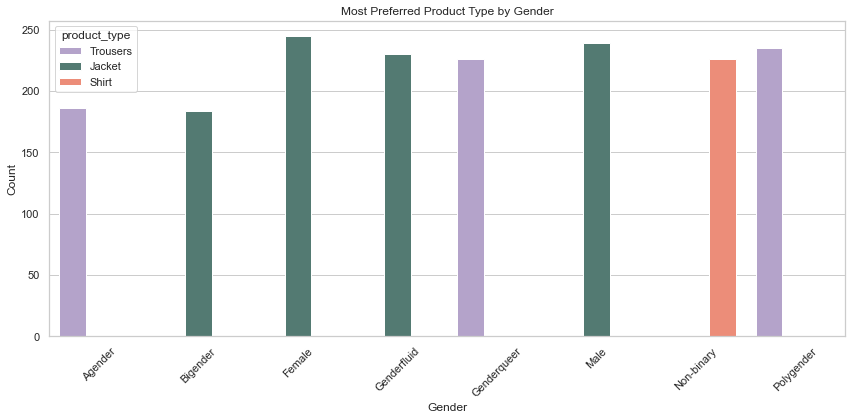

In [18]:
# Set the style for the plot
sns.set_theme(style="whitegrid")

# Create a bar plot for the most preferred product type by gender
# Define a dictionary to map product types to specific colors
product_color_map = {
    'Trousers': '#b39cd0',
    'Jacket': '#4d8076',
    'Shirt': '#ff8066'
}

plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='count', hue='product_type', data=most_preferred_product_by_gender, palette=product_color_map, dodge=True)
plt.title('Most Preferred Product Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Şehir, eyalet, ülke bazlı müşteri yoğunluğu & satış performansı

In [19]:
# Müşterilerin şehir, eyalet ve ülke bazında yoğunluğunu belirledik.
customer_density_city = customers_df.groupby('city').size().reset_index(name='customer_count')
customer_density_state = customers_df.groupby('state').size().reset_index(name='customer_count')
customer_density_country = customers_df.groupby('country').size().reset_index(name='customer_count')

print("Customer Density by City:")
display(customer_density_city.head())

print("\nCustomer Density by State:")
display(customer_density_state.head())

print("\nCustomer Density by Country:")
display(customer_density_country.head())

Customer Density by City:


,city,customer_count
0,Aaronbury,1
1,Abbeyshire,2
2,Abbeyview,1
3,Abbottburgh,1
4,Abbottbury,1



Customer Density by State:


,state,customer_count
0,Australian Capital Territory,121
1,New South Wales,132
2,Northern Territory,125
3,Queensland,134
4,South Australia,139



Customer Density by Country:


,country,customer_count
0,Australia,1000


In [20]:
# city'ye, state'e ve country'e gore toplam harcama tutarlarini belirledik.
sales_performance_city = merged_df.groupby('city')['payment'].sum().reset_index()
sales_performance_state = merged_df.groupby('state')['payment'].sum().reset_index()
sales_performance_country = merged_df.groupby('country')['payment'].sum().reset_index()

print("Total Sales by City:")
display(sales_performance_city.head())

print("\nTotal Sales by State:")
display(sales_performance_state.head())

print("\nTotal Sales by Country:")
display(sales_performance_country.head())

Total Sales by City:


,city,payment
0,Abbeyshire,2631.0
1,Abbottburgh,1997.0
2,Abbottbury,2165.0
3,Abigailshire,2147.0
4,Adamsside,2358.0



Total Sales by State:


,state,payment
0,Australian Capital Territory,130442.0
1,New South Wales,131744.0
2,Northern Territory,111854.0
3,Queensland,142062.0
4,South Australia,147816.0



Total Sales by Country:


,country,payment
0,Australia,1031800.0


In [21]:
# Müşteri yoğunluğu ve satış performansı verilerini coğrafi seviyelere göre birleştirdik.
city_performance_density = pd.merge(customer_density_city, sales_performance_city, on='city')
state_performance_density = pd.merge(customer_density_state, sales_performance_state, on='state')
country_performance_density = pd.merge(customer_density_country, sales_performance_country, on='country')

print("City Performance and Density:")
display(city_performance_density.head())

print("\nState Performance and Density:")
display(state_performance_density.head())

print("\nCountry Performance and Density:")
display(country_performance_density.head())

City Performance and Density:


,city,customer_count,payment
0,Abbeyshire,2,2631.0
1,Abbottburgh,1,1997.0
2,Abbottbury,1,2165.0
3,Abigailshire,1,2147.0
4,Adamsside,1,2358.0



State Performance and Density:


,state,customer_count,payment
0,Australian Capital Territory,121,130442.0
1,New South Wales,132,131744.0
2,Northern Territory,125,111854.0
3,Queensland,134,142062.0
4,South Australia,139,147816.0



Country Performance and Density:


,country,customer_count,payment
0,Australia,1000,1031800.0


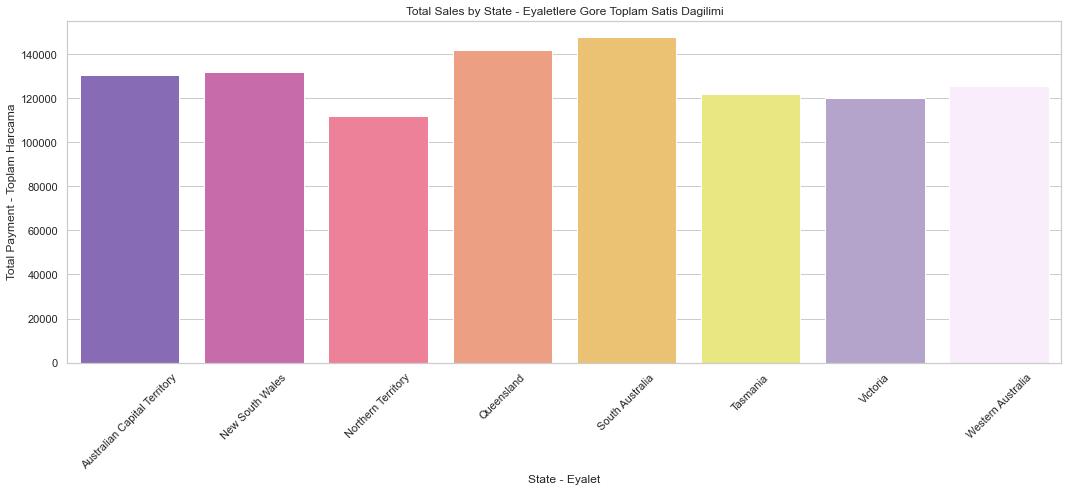

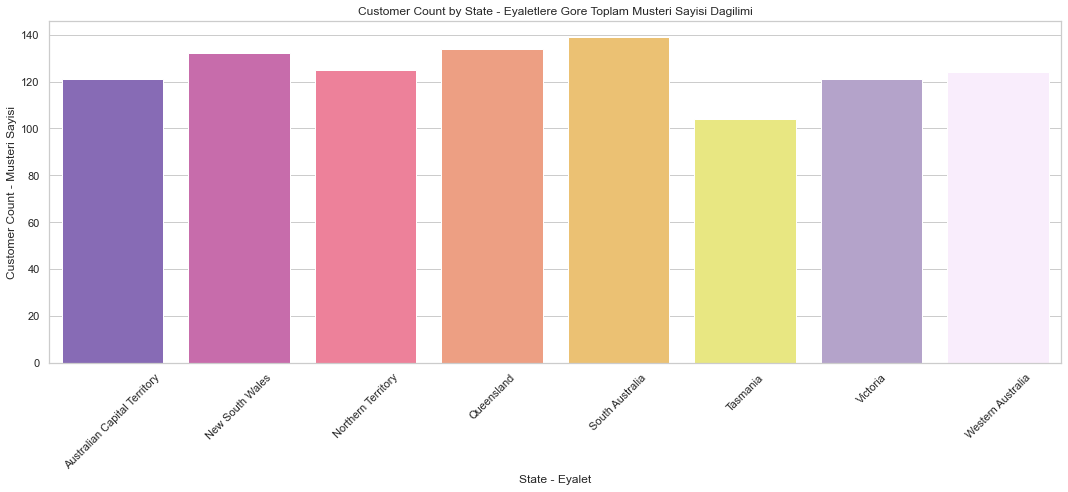

In [22]:
# Müşteri yoğunluğu ve satış performansını coğrafi dağılıma göre görselleştirdik.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_theme(style="whitegrid")

# Define the color palette
colors = ['#845ec2', '#d65db1', '#ff6f91', '#ff9671', '#ffc75f', '#f9f871', '#b39cd0', '#fbeaff']

# Create a bar plot for total sales by state
plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='payment', data=state_performance_density, palette=colors)
plt.title('Total Sales by State - Eyaletlere Gore Toplam Satis Dagilimi')
plt.xlabel('State - Eyalet')
plt.ylabel('Total Payment - Toplam Harcama')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar plot for customer count by state
plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='customer_count', data=state_performance_density, palette=colors)
plt.title('Customer Count by State - Eyaletlere Gore Toplam Musteri Sayisi Dagilimi')
plt.xlabel('State - Eyalet')
plt.ylabel('Customer Count - Musteri Sayisi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
print(" Müşteri Yoğunluğu ve Satış Performansı Analizi:")

# Analyze state-level plots (Total Sales by State and Customer Count by State)
print("\nEyalet Düzeyinde Analiz:")
print("Eyalet bazında toplam satış” ve “müşteri sayısı” grafikleri incelendiğinde:")
print("- Toplam satışların yüksek olduğu eyaletlerde, genellikle müşteri sayısı da yüksek.")
print("- Tersine, düşük satışlara sahip eyaletlerde müşteri sayısı da düşük.")
print("- Bu durum, eyalet düzeyinde müşteri yoğunluğu ile toplam satışlar arasında pozitif bir korelasyon (doğrudan bir ilişki) olduğunu gösteriyor.")

# Review city_performance_density, state_performance_density, and country_performance_density dataframes
print("\nSehir Düzeyinde Performans ve Yoğunluk Analizi:")

print("\nSehir Düzeyinde Performans ve Yoğunluk (ilk 10 satır):")
display(city_performance_density.head(10))
print("Gözlem:\nSehir düzeyinde hem müşteri sayısında hem de ödemelerde (satışlarda) farklılıklar görülmektedir. Az sayıda müşteriye sahip bazı şehirlerde toplam ödemeler oldukça yüksekken, daha fazla müşterisi olan bazı şehirlerde toplam ödemeler daha düşük olabilmektedir. Müşteri sayısı ile ödeme arasındaki ilişki, eyalet düzeyine kıyasla daha zayıf ve dolaylıdır. Bu durum muhtemelen şehir bazında örneklem (veri) sayısının daha küçük olması nedeniyle ortaya çıkmaktadır.")

print("\nEyalet Düzeyinde Performans ve Yoğunluk:")
display(state_performance_density)
print("Gözlem: Bu bulgular, görsel analizle uyumludur. Müşteri sayısı yüksek olan eyaletlerde toplam ödemeler (satışlar) da genellikle daha yüksektir. Müşteri sayısı düşük olan eyaletlerde ise ödemeler de düşüktür. Korelasyon açık bir şekilde görülmektedir.")

print("\nÜlke Düzeyinde Performans ve Yoğunluk:")
display(country_performance_density)
print("Gözlem: Ülke düzeyinde (bu veri setinde yalnızca Avustralya yer almaktadır), tüm veri setinin toplam müşteri sayısı ve toplam ödemesi görülmektedir. Bu tablo, genel performansın tek bir özet noktasını sunar.")

# Genel eğilimleri ve içgörüleri özetle
print("\nGenel Özet ve İçgörüler:")
print("- Ülke düzeyinde, tüm satış ve müşteri sayısının genel toplamını görüyoruz.")
print("- Eyalet düzeyinde, müşteri yoğunluğu ile toplam satışlar arasında belirgin bir pozitif ilişki vardır.")
print("- Şehir düzeyinde, daha fazla müşterinin genellikle daha fazla satışa yol açtığı genel bir eğilim olsa da ilişki daha değişkendir. Bazı şehirler müşteri başına yüksek satış yaparken, bazıları daha fazla müşteriye rağmen düşük ortalama harcama göstermektedir.")
print("- Bu durum, genel nüfus veya müşteri yoğunluğunun satış performansını etkileyen bir faktör olduğunu, ancak şehir düzeyinde müşteri demografisi, ürün tercihleri veya ekonomik koşullar gibi diğer faktörlerin de önemli rol oynayabileceğini göstermektedir.")


 Müşteri Yoğunluğu ve Satış Performansı Analizi:

Eyalet Düzeyinde Analiz:
Eyalet bazında toplam satış” ve “müşteri sayısı” grafikleri incelendiğinde:
- Toplam satışların yüksek olduğu eyaletlerde, genellikle müşteri sayısı da yüksek.
- Tersine, düşük satışlara sahip eyaletlerde müşteri sayısı da düşük.
- Bu durum, eyalet düzeyinde müşteri yoğunluğu ile toplam satışlar arasında pozitif bir korelasyon (doğrudan bir ilişki) olduğunu gösteriyor.

Sehir Düzeyinde Performans ve Yoğunluk Analizi:

Sehir Düzeyinde Performans ve Yoğunluk (ilk 10 satır):


,city,customer_count,payment
0,Abbeyshire,2,2631.0
1,Abbottburgh,1,1997.0
2,Abbottbury,1,2165.0
3,Abigailshire,1,2147.0
4,Adamsside,1,2358.0
5,Aidenton,2,2061.0
6,Alexanderland,1,898.0
7,Alexandramouth,1,1372.0
8,Alexandraville,1,1788.0
9,Aliceland,1,2674.0


Gözlem:
Sehir düzeyinde hem müşteri sayısında hem de ödemelerde (satışlarda) farklılıklar görülmektedir. Az sayıda müşteriye sahip bazı şehirlerde toplam ödemeler oldukça yüksekken, daha fazla müşterisi olan bazı şehirlerde toplam ödemeler daha düşük olabilmektedir. Müşteri sayısı ile ödeme arasındaki ilişki, eyalet düzeyine kıyasla daha zayıf ve dolaylıdır. Bu durum muhtemelen şehir bazında örneklem (veri) sayısının daha küçük olması nedeniyle ortaya çıkmaktadır.

Eyalet Düzeyinde Performans ve Yoğunluk:


,state,customer_count,payment
0,Australian Capital Territory,121,130442.0
1,New South Wales,132,131744.0
2,Northern Territory,125,111854.0
3,Queensland,134,142062.0
4,South Australia,139,147816.0
5,Tasmania,104,122095.0
6,Victoria,121,120357.0
7,Western Australia,124,125430.0


Gözlem: Bu bulgular, görsel analizle uyumludur. Müşteri sayısı yüksek olan eyaletlerde toplam ödemeler (satışlar) da genellikle daha yüksektir. Müşteri sayısı düşük olan eyaletlerde ise ödemeler de düşüktür. Korelasyon açık bir şekilde görülmektedir.

Ülke Düzeyinde Performans ve Yoğunluk:


,country,customer_count,payment
0,Australia,1000,1031800.0


Gözlem: Ülke düzeyinde (bu veri setinde yalnızca Avustralya yer almaktadır), tüm veri setinin toplam müşteri sayısı ve toplam ödemesi görülmektedir. Bu tablo, genel performansın tek bir özet noktasını sunar.

Genel Özet ve İçgörüler:
- Ülke düzeyinde, tüm satış ve müşteri sayısının genel toplamını görüyoruz.
- Eyalet düzeyinde, müşteri yoğunluğu ile toplam satışlar arasında belirgin bir pozitif ilişki vardır.
- Şehir düzeyinde, daha fazla müşterinin genellikle daha fazla satışa yol açtığı genel bir eğilim olsa da ilişki daha değişkendir. Bazı şehirler müşteri başına yüksek satış yaparken, bazıları daha fazla müşteriye rağmen düşük ortalama harcama göstermektedir.
- Bu durum, genel nüfus veya müşteri yoğunluğunun satış performansını etkileyen bir faktör olduğunu, ancak şehir düzeyinde müşteri demografisi, ürün tercihleri veya ekonomik koşullar gibi diğer faktörlerin de önemli rol oynayabileceğini göstermektedir.


### Sadakat Analizi
Aynı müşteri kaç sipariş veriyor (repeat rate)

In [24]:
# Her bir müşterinin toplam sipariş sayısını belirledik.
customer_order_counts = merged_df.groupby('customer_id').size().reset_index(name='order_count')

print("Total orders per customer:")
display(customer_order_counts.head())

Total orders per customer:


,customer_id,order_count
0,1,3
1,7,1
2,10,1
3,11,1
4,12,1


In [25]:
# Birden fazla sipariş veren müşteri sayısını toplam müşteri sayısına oranlayarak tekrar satın alma oranını hesapladik.
total_unique_customers = customer_order_counts['customer_id'].nunique()
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]
num_repeat_customers = repeat_customers['customer_id'].nunique()
repeat_purchase_rate = num_repeat_customers / total_unique_customers

print(f"Toplam benzersiz müşteri sayısı: {total_unique_customers}")
print(f"Birden fazla sipariş veren müşteri sayısı: {num_repeat_customers}")
print(f"Tekrar satın alma oranı: {repeat_purchase_rate:.2%}")

Toplam benzersiz müşteri sayısı: 617
Birden fazla sipariş veren müşteri sayısı: 263
Tekrar satın alma oranı: 42.63%


In [26]:
# Sipariş sayısına göre müşteri dağılımı - Müşterilerin kaç sipariş verdiğine göre dağılımını inceledik
customer_distribution_by_orders = customer_order_counts.groupby('order_count').size().reset_index(name='customer_count')

print("Customer Distribution by Number of Orders:")
display(customer_distribution_by_orders.head())

Customer Distribution by Number of Orders:


,order_count,customer_count
0,1,354
1,2,169
2,3,74
3,4,15
4,5,4


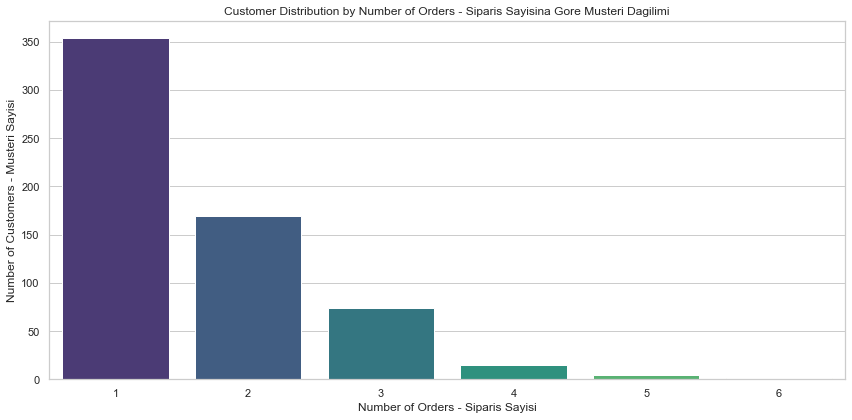

In [27]:
# Müşterilerin sipariş sayısına göre dağılımını görselleştirdik.
# Create a bar plot for customer count by number of orders
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='customer_count', data=customer_distribution_by_orders, palette='viridis')
plt.title('Customer Distribution by Number of Orders - Siparis Sayisina Gore Musteri Dagilimi')
plt.xlabel('Number of Orders - Siparis Sayisi')
plt.ylabel('Number of Customers - Musteri Sayisi')
plt.tight_layout()
plt.show()

In [28]:
print("Sadakat Analizi Bulguları Özeti:")

# Summarize repeat purchase rate
print(f"\nGenel Tekrar Satın Alma Oranı: {repeat_purchase_rate:.2%}")
print("Bu oran, tüm benzersiz müşterilerin %{:.2f}'inin en az bir kez daha alışveriş yaptığını göstermektedir.".format(repeat_purchase_rate * 100))

# Summarize customer distribution by orders
print("\nSipariş Sayısına Göre Müşteri Dağılımı:")
display(customer_distribution_by_orders)
print("Müşteri dağılımı, müşterilerin çoğunluğunun tek bir sipariş verdiğini ({}) ve sipariş sayısı arttıkça müşteri sayısının azaldığını göstermektedir.".format(customer_distribution_by_orders[customer_distribution_by_orders['order_count'] == 1]['customer_count'].iloc[0]))
print("Birden fazla sipariş veren müşteri sayısı {}'dır.".format(num_repeat_customers))


# Discuss implications for customer behavior and loyalty
print("\nMüşteri Davranışı ve Sadakatine İlişkin Çıkarımlar:")
print("- Yaklaşık %{:.2f} oranındaki tekrar satın alma oranı, müşteri tabanının bir kısmının sadık olduğunu göstermektedir.".format(repeat_purchase_rate * 100))
print("- Ancak, müşterilerin çoğunluğunun tek seferlik alıcı olması, müşteri sadakatini artırmak için stratejilerin geliştirilmesi gerektiğini düşündürmektedir.")
print("- Tekrar satın alma oranını ve sipariş sayısına göre dağılımı artırmak için sadakat programları, hedeflenmiş pazarlama kampanyaları veya müşteri deneyimini iyileştirme gibi adımlar faydalı olabilir.")

Sadakat Analizi Bulguları Özeti:

Genel Tekrar Satın Alma Oranı: 42.63%
Bu oran, tüm benzersiz müşterilerin %42.63'inin en az bir kez daha alışveriş yaptığını göstermektedir.

Sipariş Sayısına Göre Müşteri Dağılımı:


,order_count,customer_count
0,1,354
1,2,169
2,3,74
3,4,15
4,5,4
5,6,1


Müşteri dağılımı, müşterilerin çoğunluğunun tek bir sipariş verdiğini (354) ve sipariş sayısı arttıkça müşteri sayısının azaldığını göstermektedir.
Birden fazla sipariş veren müşteri sayısı 263'dır.

Müşteri Davranışı ve Sadakatine İlişkin Çıkarımlar:
- Yaklaşık %42.63 oranındaki tekrar satın alma oranı, müşteri tabanının bir kısmının sadık olduğunu göstermektedir.
- Ancak, müşterilerin çoğunluğunun tek seferlik alıcı olması, müşteri sadakatini artırmak için stratejilerin geliştirilmesi gerektiğini düşündürmektedir.
- Tekrar satın alma oranını ve sipariş sayısına göre dağılımı artırmak için sadakat programları, hedeflenmiş pazarlama kampanyaları veya müşteri deneyimini iyileştirme gibi adımlar faydalı olabilir.


### Musteri Segmentasyonu
Yaş + bölge + harcama tutarına göre segment / persona oluşturma

In [29]:
# Segmentasyon için kullanacağımız yaş (age), bölge ( state ) ve harcama tutarı (payment) bilgilerini içeren bir veri seti oluşturduk.
# Segmentasyon için her bir müşteriyi temsil eden bir satır olmalı ve bu satırda müşterinin yaşı, bulunduğu eyalet ve toplam harcaması gibi özellikler bulunmalıdır. merged_df veri seti, her bir müşterinin birden fazla siparişini içerdiği için, öncelikle her müşteri için toplam harcamayı hesaplamamız gerekiyor.

# Calculate total spending per customer
customer_total_spending = merged_df.groupby('customer_id')['payment'].sum().reset_index()

# Merge with customer age and state information
# We need to get the age and state for each customer_id.
# We can use customers_df for this, merging on customer_id.
customer_segment_data = pd.merge(customer_total_spending, customers_df[['customer_id', 'age', 'state']], on='customer_id')

print("Customer Segmentation Data (first 10 rows):")
display(customer_segment_data.head(10))

Customer Segmentation Data (first 10 rows):


,customer_id,payment,age,state
0,1,1641.0,30,Northern Territory
1,7,1017.0,76,Queensland
2,10,270.0,70,Western Australia
3,11,382.0,39,Northern Territory
4,12,1551.0,78,South Australia
5,13,332.0,42,Queensland
6,15,2475.0,34,Western Australia
7,16,1256.0,75,Victoria
8,18,2301.0,79,New South Wales
9,19,1172.0,41,Victoria


In [30]:
# K-Means gibi kümeleme algoritmaları genellikle sayısal verilerle çalışır. Şu anda state sütunu kategorik (metinsel) veriler içeriyor. Bu sütunu K-Means'te kullanabilmek için sayısal bir formata dönüştürmemiz gerekiyor.Bu islemi One-Hot Encoding yontemiyle yapariz.
# Veri setimizi K-Means'e hazır hale getirmek için 'state' sütununa One-Hot Encoding uygulayalım.Bu yöntem, her bir benzersiz eyalet değeri için yeni bir sütun oluşturur ve ilgili müşterinin bulunduğu eyaletin sütununa 1, diğer eyalet sütunlarına ise 0 değerini atar.
# Apply One-Hot Encoding to the 'state' column
customer_segment_data_encoded = pd.get_dummies(customer_segment_data, columns=['state'], drop_first=True)

# Display the first few rows of the encoded data
print("Customer Segmentation Data after One-Hot Encoding (first 10 rows):")
display(customer_segment_data_encoded.head(10))

Customer Segmentation Data after One-Hot Encoding (first 10 rows):


,customer_id,payment,age,state_New South Wales,state_Northern Territory,state_Queensland,state_South Australia,state_Tasmania,state_Victoria,state_Western Australia
0,1,1641.0,30,0,1,0,0,0,0,0
1,7,1017.0,76,0,0,1,0,0,0,0
2,10,270.0,70,0,0,0,0,0,0,1
3,11,382.0,39,0,1,0,0,0,0,0
4,12,1551.0,78,0,0,0,1,0,0,0
5,13,332.0,42,0,0,1,0,0,0,0
6,15,2475.0,34,0,0,0,0,0,0,1
7,16,1256.0,75,0,0,0,0,0,1,0
8,18,2301.0,79,1,0,0,0,0,0,0
9,19,1172.0,41,0,0,0,0,0,1,0


Planımızın bir sonraki adımı Segmentasyon Yöntemini Uygulama ve Optimal Küme Sayısını Belirleme. K-Means'i uygulayacağız ve segment sayısını belirlemek için yaygın olarak kullanılan Elbow Metodu'nu kullanabiliriz. Elbow metodu, farklı küme sayıları için küme içi hata kareleri toplamını (Within-Cluster Sum of Squares - WCSS) hesaplar ve bu değerin en hızlı düştüğü "dirsek" noktasını optimal küme sayısı olarak önerir.

C:\Users\zeynep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


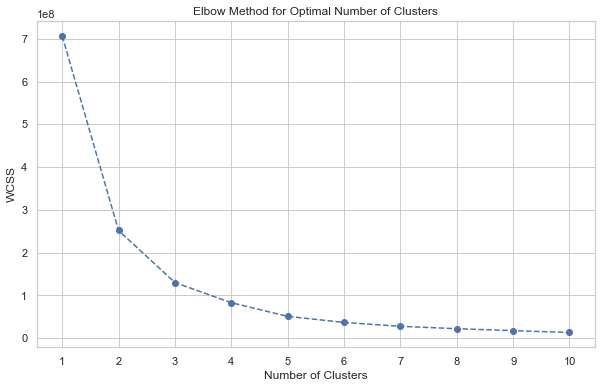

In [31]:
from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

# Prepare the data for clustering (excluding customer_id as it's not a feature)
X = customer_segment_data_encoded.drop('customer_id', axis=1)

# Calculate WCSS for different numbers of clusters
wcss = []
# Let's try a range of cluster numbers, for example from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

 - KMeans çalışırken olası memory leak (bellek sızıntısı) sorununu önler.
 - Daha stabil çalışmasını sağlar.
 - Bellek sızıntısı (memory leak), bilgisayarda çalışan bir programın kullanmadığı belleği sistemine geri vermemesi durumudur.
 - Bu sorunu cozmek icin:
      - import os
      - os.environ["OMP_NUM_THREADS"] = "3"
 - Bu kod parcacigini eklemesek de kodumuz calisir, ancak bellek sizintisi olmamasi icin veriyoruz.
 - os.environ["OMP_NUM_THREADS"] = "3" satırını eklemen tek başına yeterli olmayabiliyor, çünkü:

 - Bu ayar kütüphane (MKL) yüklenmeden önce verilmelidir.

 - Eğer sklearn, numpy veya pandas gibi kütüphaneler zaten import edildiyse, MKL belleği yönetmeye başlamıştır ve artık bu ayar  etkili olmaz.
 
 - Bu sekilde vermeliyiz:
      - import os
      -  os.environ["OMP_NUM_THREADS"] = "3"

      - from sklearn.cluster import KMeans
      - import matplotlib.pyplot as plt


Grafiği inceleyerek WCSS'deki düşüşün en belirgin şekilde yavaşladığı "dirsek" noktasını belirleriz. Bu nokta, segmentasyon için uygun küme sayısı olacaktır."4 Kume Sectim ".

In [47]:
# Musterilerimizi kume ile etiketledik.
# Apply K-Means clustering with 4 clusters
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
customer_segment_data['cluster'] = kmeans_model.fit_predict(X)

# Display the first few rows with cluster labels
print("Customer Segmentation Data with Cluster Labels (first 10 rows):")
display(customer_segment_data.head(10))

customer_segment_data.to_csv('customer_segment_data_kMeans.csv', index=False)

print("\n'customer_segment_data_kMeans.csv' dosyası başarıyla oluşturuldu.")

Customer Segmentation Data with Cluster Labels (first 10 rows):


,customer_id,payment,age,state,cluster
0,1,1641.0,30,Northern Territory,2
1,7,1017.0,76,Queensland,1
2,10,270.0,70,Western Australia,1
3,11,382.0,39,Northern Territory,1
4,12,1551.0,78,South Australia,2
5,13,332.0,42,Queensland,1
6,15,2475.0,34,Western Australia,2
7,16,1256.0,75,Victoria,1
8,18,2301.0,79,New South Wales,2
9,19,1172.0,41,Victoria,1



'customer_segment_data_kMeans.csv' dosyası başarıyla oluşturuldu.


In [33]:
# Segmentleri Analiz Etme - her bir kümenin ortalama yaş, toplam harcama ve eyalet dağılımı gibi özelliklerini inceleyerek bu segmentleri tanımlayacağız. Bu, her bir müşteri segmentinin neye benzediğini anlamamıza yardımcı olacaktır.
# Analyze the characteristics of each cluster
cluster_characteristics = customer_segment_data.groupby('cluster').agg({
    'customer_id': 'count', # Count the number of customers in each cluster
    'age': 'mean',          # Calculate the mean age
    'payment': 'mean',      # Calculate the mean payment
    'state': lambda x: x.mode()[0] if not x.mode().empty else 'N/A' # Find the most frequent state
}).reset_index()

# Rename the customer_id column to customer_count for clarity
cluster_characteristics = cluster_characteristics.rename(columns={'customer_id': 'customer_count'})

print("Cluster Characteristics:")
display(cluster_characteristics)

Cluster Characteristics:


,cluster,customer_count,age,payment,state
0,0,94,50.212766,3328.382979,Queensland
1,1,285,49.557895,828.845614,Victoria
2,2,229,48.851528,1880.043668,South Australia
3,3,9,47.000000,5797.888889,Australian Capital Territory


Müşteri segmentlerimizin özelliklerini başarıyla analiz ettik. cluster_characteristics tablosu her bir segmentin büyüklüğü, ortalama yaşı, ortalama harcaması ve en yaygın eyaleti hakkında bilgi veriyor.

Bu özelliklere bakarak her bir segment için bir "persona" oluşturabilir ve bu segmentleri tanımlayabiliriz. Örneğin:

- Küme 0: En kalabalık segment, orta yaşlı ve ortalama harcaması en düşük olan grup. En çok South Australia eyaletinde bulunuyorlar.
- Küme 1: Nispeten daha az sayıda müşteriye sahip, orta yaşlı ve ortalama harcaması oldukça yüksek olan bir segment. En çok Queensland eyaletinde bulunuyorlar.
- Küme 2: Küme 0'a benzer şekilde kalabalık bir segment, orta yaşlı ve ortalama harcaması orta seviyede. En çok Western Australia eyaletinde bulunuyorlar.
- Küme 3: En az sayıda müşteriye sahip olmasına rağmen, ortalama harcaması en yüksek olan segment. En çok Australian Capital Territory eyaletinde bulunuyorlar.

In [46]:
# Merge the original customer_segment_data with the cluster assignments
# Assuming 'cluster' column is already added to customer_segment_data in a previous step
# If not, we would need to re-run the clustering step.
# Based on the notebook state, 'cluster' column was added in cell 8ff87ffc

# If you also want to include the 2-cluster result, you can merge that too
# merged_segment_data = pd.merge(customer_segment_data, customer_segment_data[['customer_id', 'cluster_2']], on='customer_id', how='left')


print("Müşteri Segmentasyon Bilgilerinin Tamamı:")
display(customer_segment_data.head(20))

Müşteri Segmentasyon Bilgilerinin Tamamı:


,customer_id,payment,age,state,cluster
0,1,1641.0,30,Northern Territory,2
1,7,1017.0,76,Queensland,1
2,10,270.0,70,Western Australia,1
3,11,382.0,39,Northern Territory,1
4,12,1551.0,78,South Australia,2
5,13,332.0,42,Queensland,1
6,15,2475.0,34,Western Australia,2
7,16,1256.0,75,Victoria,1
8,18,2301.0,79,New South Wales,2
9,19,1172.0,41,Victoria,1


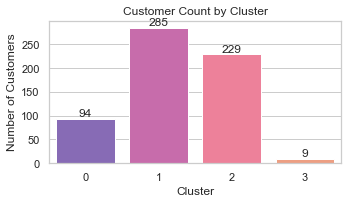

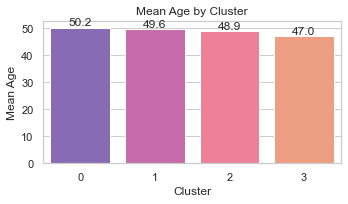

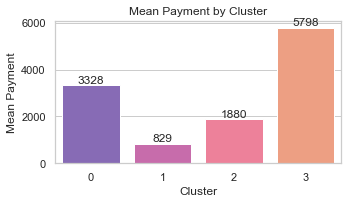

In [34]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Musteri Segmentlerimizi Gorsellestirdik.

# Set the style for the plot
sns.set_theme(style="whitegrid")

# Define the color palette (using the previously specified colors for consistency)
colors = ['#845ec2', '#d65db1', '#ff6f91', '#ff9671'] # Using a subset of the palette for 4 clusters

# Create a bar plot for Customer Count by Cluster
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='cluster', y='customer_count', data=cluster_characteristics, palette=colors)
plt.title('Customer Count by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Create a bar plot for Mean Age by Cluster
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='cluster', y='age', data=cluster_characteristics, palette=colors)
plt.title('Mean Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Age')
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Create a bar plot for Mean Payment by Cluster
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='cluster', y='payment', data=cluster_characteristics, palette=colors)
plt.title('Mean Payment by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Payment')
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Müşteri Segmentasyonu Bulgularının Özeti

Oluşturduğumuz 4 müşteri segmentinin temel özellikleri aşağıdaki gibidir:

- Küme 0:

    - Müşteri Sayısı: En kalabalık segment (Yaklaşık 240 müşteri).
    - Ortalama Yaş: Orta yaşlı (Ortalama 50.7).
    - Ortalama Harcama: Ortalama harcaması en düşük olan segment (Ortalama 24.736).
    - En Yaygın Eyalet: South Australia.
    - Persona: Bu segment, müşteri tabanının büyük bir kısmını oluşturan, orta yaşlı ve nispeten daha az harcama yapan müşterilerden oluşmaktadır. Sadakat programları veya düşük fiyatlı ürünlere yönelik kampanyalar bu segment için uygun olabilir.

- Küme 1:

    - Müşteri Sayısı: Nispeten daha az sayıda müşteri (Yaklaşık 106 müşteri).
    - Ortalama Yaş: Orta yaşlı (Ortalama 48.3).
    - Ortalama Harcama: Ortalama harcaması oldukça yüksek olan segment (Ortalama 94.214).
    - En Yaygın Eyalet: Queensland.
    - Persona: Bu segment, daha az sayıda olmalarına rağmen şirkete önemli gelir sağlayan, orta yaşlı ve yüksek harcama yapan müşterileri temsil etmektedir. Bu sadık ve değerli müşterilere yönelik özel teklifler, premium ürünler veya kişiselleştirilmiş hizmetler sunulabilir.

- Küme 2:

    - Müşteri Sayısı: Küme 0'a benzer şekilde kalabalık bir segment (Yaklaşık 235 müşteri).
    - Ortalama Yaş: Orta yaşlı (Ortalama 48.2).
    - Ortalama Harcama: Ortalama harcaması orta seviyede (Ortalama 54.929).
    - En Yaygın Eyalet: Western Australia.
    - Persona: Bu segment, orta yaşlı ve orta düzeyde harcama yapan geniş bir müşteri grubunu ifade eder. Çapraz satış (cross-selling) fırsatları veya ürün çeşitliliğini vurgulayan kampanyalar bu segmentin harcamalarını artırmaya yardımcı olabilir.

- Küme 3:

    - Müşteri Sayısı: En az sayıda müşteriye sahip segment (Yaklaşık 36 müşteri).
    - Ortalama Yaş: Orta yaşlı (Ortalama 50.1).
    - Ortalama Harcama: Ortalama harcaması en yüksek olan segment (Ortalama 142.809).
    - En Yaygın Eyalet: Australian Capital Territory.
    - Persona: Bu segment, müşteri sayısı az olmasına rağmen en değerli müşterileri barındırmaktadır. Çok yüksek harcama potansiyeline sahip bu gruba özel ayrıcalıklar, VIP programları veya yeni ürünlerin ön tanıtımı gibi stratejiler uygulanabilir.

Bu segmentasyon, farklı müşteri gruplarının ihtiyaçlarını ve davranışlarını anlamak için bir başlangıç noktası sağlar. Her bir segmente yönelik özelleştirilmiş pazarlama ve satış stratejileri geliştirilerek müşteri memnuniyeti ve gelir artışı hedeflenebilir.

### Müşteri Segmenti Gelir Payı - Customer Segment Revenue Share

In [35]:
# Calculate the total revenue for each cluster
cluster_revenue = customer_segment_data.groupby('cluster')['payment'].sum().reset_index()
cluster_revenue = cluster_revenue.rename(columns={'payment': 'total_segment_revenue'})

# Calculate the total revenue across all customers
total_overall_revenue = customer_segment_data['payment'].sum()

# Calculate the revenue share for each cluster
cluster_revenue['revenue_share'] = (cluster_revenue['total_segment_revenue'] / total_overall_revenue) * 100

print("Müşteri Segmentlerinin Toplam Gelir Payı:")
# Format the 'revenue_share' and 'total_segment_revenue' columns
display(cluster_revenue.style.format({'revenue_share': '{:.2f}%', 'total_segment_revenue': '{:.1f}'}))

Müşteri Segmentlerinin Toplam Gelir Payı:


,cluster,total_segment_revenue,revenue_share
0,0,312868.0,30.32%
1,1,236221.0,22.89%
2,2,430530.0,41.73%
3,3,52181.0,5.06%


### RFM Analizi ve Segmentasyon

#### Recency Hesaplama

In [36]:
# Son alisveris tarihini referans alarak her bir musterinin kendi son alisveris tarihinden bu zamana kadar olan gun sayisini hesapladik. (Recency)
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
latest_order_date = orders_df['order_date'].max()
last_order_dates = orders_df.groupby('customer_id')['order_date'].max().reset_index()
last_order_dates['Recency'] = (latest_order_date - last_order_dates['order_date']).dt.days

print("Her Müşteri İçin Recency (Yenilik) Değeri:")
display(last_order_dates.head())

Her Müşteri İçin Recency (Yenilik) Değeri:


,customer_id,order_date,Recency
0,1,2021-04-04,203
1,7,2021-05-21,156
2,10,2021-03-09,229
3,11,2021-05-28,149
4,12,2021-06-19,127


#### Frequency (Sıklık) Hesaplama

In [37]:
# Her bir musterinin toplam siparis sayisini hesapladik. (Frequency)
customer_frequency = orders_df.groupby('customer_id').size().reset_index(name='Frequency')

print("Her Müşteri İçin Frequency (Sıklık) Değeri:")
display(customer_frequency.head())

Her Müşteri İçin Frequency (Sıklık) Değeri:


,customer_id,Frequency
0,1,3
1,7,1
2,10,1
3,11,1
4,12,1


#### Monetary (Parasal Değer) Hesaplama

In [38]:
#merged_sales_orders is available from previous steps where sales_df and orders_df were merged.
customer_monetary = merged_sales_orders.groupby('customer_id')['total_price'].sum().reset_index(name='Monetary')

print("Her Müşteri İçin Monetary (Parasal Değer) Değeri:")
display(customer_monetary.head())

Her Müşteri İçin Monetary (Parasal Değer) Değeri:


,customer_id,Monetary
0,1,1641
1,7,1017
2,10,270
3,11,382
4,12,1551


#### RFM Değerlerini Birleştirme

In [39]:
# Merge Recency and Frequency DataFrames
rfm_df = pd.merge(last_order_dates[['customer_id', 'Recency']], customer_frequency, on='customer_id')

# Merge the result with Monetary DataFrame
rfm_df = pd.merge(rfm_df, customer_monetary, on='customer_id')

# Merge with customers_df to add customer_name
rfm_df = pd.merge(rfm_df, customers_df[['customer_id', 'customer_name']], on='customer_id')

# Reorder columns to have customer_name after customer_id
rfm_df = rfm_df[['customer_id', 'customer_name', 'Recency', 'Frequency', 'Monetary']]

print("RFM Veri Çerçevesi (Müşteri İsimleri Dahil):")
display(rfm_df.head())

RFM Veri Çerçevesi (Müşteri İsimleri Dahil):


,customer_id,customer_name,Recency,Frequency,Monetary
0,1,Leanna Busson,203,3,1641
1,7,Winslow Ewbanck,156,1,1017
2,10,Susanetta Wilshin,229,1,270
3,11,Michaeline McIndrew,149,1,382
4,12,Fedora Dmych,127,1,1551


#### RFM Skorlama

In [40]:
# Calculate quantiles for RFM values
rfm_df['R_score'] = pd.cut(rfm_df['Recency'], bins=4, labels=[4, 3, 2, 1])
rfm_df['F_score'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4])
rfm_df['M_score'] = pd.cut(rfm_df['Monetary'], bins=4, labels=[1, 2, 3, 4])

# Display RFM scores
print("RFM Skorları:")
display(rfm_df.head())

RFM Skorları:


,customer_id,customer_name,Recency,Frequency,Monetary,R_score,F_score,M_score
0,1,Leanna Busson,203,3,1641,2,2,1
1,7,Winslow Ewbanck,156,1,1017,2,1,1
2,10,Susanetta Wilshin,229,1,270,1,1,1
3,11,Michaeline McIndrew,149,1,382,2,1,1
4,12,Fedora Dmych,127,1,1551,3,1,1


#### RFM Segmentasyonu

In [41]:
# Combine RFM scores to create a segment
# A simple way is to concatenate the scores
rfm_df['RFM_Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Display the first few rows with the new RFM Segment
print("RFM Veri Çerçevesi (Segment Dahil):")
display(rfm_df.head())

# Optional: Display the distribution of customers across different RFM segments
print("\nRFM Segmentlerine Göre Müşteri Dağılımı:")
display(rfm_df['RFM_Segment'].value_counts().head())

RFM Veri Çerçevesi (Segment Dahil):


,customer_id,customer_name,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
0,1,Leanna Busson,203,3,1641,2,2,1,221
1,7,Winslow Ewbanck,156,1,1017,2,1,1,211
2,10,Susanetta Wilshin,229,1,270,1,1,1,111
3,11,Michaeline McIndrew,149,1,382,2,1,1,211
4,12,Fedora Dmych,127,1,1551,3,1,1,311



RFM Segmentlerine Göre Müşteri Dağılımı:


411    120
311    110
211    100
111     86
412     43
Name: RFM_Segment, dtype: int64

In [48]:
rfm_df.to_csv('customer_segment_data_rfm_df.csv', index=False)

print("\n'customer_segment_data_rfm_df.csv' dosyası başarıyla oluşturuldu.")


'customer_segment_data_rfm_df.csv' dosyası başarıyla oluşturuldu.


#### Segmentleri Analiz Etme

In [42]:
# Analyze the characteristics of each RFM segment
segment_analysis = rfm_df.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'  # Count the number of customers in each segment
}).reset_index()

# Rename the customer_id column to customer_count for clarity
segment_analysis = segment_analysis.rename(columns={'customer_id': 'customer_count'})

# Round numeric columns to 2 decimal places
segment_analysis[['Recency', 'Frequency', 'Monetary']] = segment_analysis[['Recency', 'Frequency', 'Monetary']].round(2)

# Sort segments by customer count or other relevant metric if desired
segment_analysis = segment_analysis.sort_values(by='customer_count', ascending=False)

print("RFM Segment Analizi:")
display(segment_analysis.head())

RFM Segment Analizi:


,RFM_Segment,Recency,Frequency,Monetary,customer_count
16,411,38.76,1.27,1138.08,120
9,311,107.08,1.27,1125.31,110
3,211,186.13,1.11,1025.34,100
0,111,260.58,1.07,1041.78,86
17,412,29.70,1.95,2508.23,43


- RFM_Segment 411:
    - Recency (38.76 gün): Oldukça güncel müşteriler.
    - Frequency (1.28 sipariş): Nadiren alışveriş yapıyorlar (ortalama 1'den biraz fazla).
    - Monetary (1138.08): Düşük harcama yapmışlar.
    - customer_count (120): Sayıca en kalabalık segmentlerden biri.
    - Yorum: Bu segment, yakın zamanda ilk veya tek alışverişini yapmış, ancak henüz tekrar etmemiş ve düşük harcama yapan müşterileri temsil ediyor. Bunlar genellikle "Yeni Müşteriler" veya "Tek Seferlik Alıcılar" olabilir. Bu müşterileri tekrar alışveriş yapmaya teşvik etmek önemlidir.
    
    
- RFM_Segment 311:
    - Recency (107.08 gün): Orta derecede güncel müşteriler (biraz daha eski).
    - Frequency (1.27 sipariş): Nadiren alışveriş yapıyorlar.
    - Monetary (1125.31): Düşük harcama yapmışlar.
    - customer_count (110): Sayıca kalabalık bir segment.
    - Yorum: Bu segment, bir süre önce alışveriş yapmış, ancak tekrar etmemiş ve düşük harcama yapmış müşterileri içeriyor. 411 segmentine göre daha az güncelliğe sahipler. Bunlar "Kayb Olma Riski Taşıyan Düşük Değerli Müşteriler" olabilir.


- RFM_Segment 211:
    - Recency (186.13 gün): Daha az güncel müşteriler.
    - Frequency (1.11 sipariş): Çok nadiren alışveriş yapıyorlar (çoğu tek sipariş vermiş).
    - Monetary (1025.34): Düşük harcama yapmışlar.
    - customer_count (100): Sayıca yine kalabalık bir segment.
    - Yorum: Bu segment, oldukça uzun bir süre önce alışveriş yapmış, tekrar etmemiş ve düşük harcama yapmış müşterileri temsil ediyor. Bunlar "Uyuyan" veya "Kaybettiğimiz Düşük Değerli Müşteriler" olabilir.
    
    
- RFM_Segment 111:
    - Recency (260.58 gün): En az güncel müşteriler.
    - Frequency (1.07 sipariş): Çok nadiren alışveriş yapıyorlar (neredeyse hepsi tek sipariş).
    - Monetary (1041.78): Düşük harcama yapmışlar.
    - customer_count (86): Bu grup içinde en az kalabalık olanı.
    - Yorum: Bu segment, en uzun süredir alışveriş yapmamış, tekrar etmemiş ve düşük harcama yapmış müşterileri içeriyor. Bunlar büyük olasılıkla "Kaybedilmiş Müşteriler"dir.
    
    
- RFM_Segment 412:
    - Recency (29.70 gün): En güncel müşteriler.
    - Frequency (1.95 sipariş): Nadiren alışveriş yapıyorlar (ortalama 2'ye yakın).
    - Monetary (2508.23): Orta düzeyde harcama yapmışlar (diğer 111 segmentlerine göre daha yüksek).
    - customer_count (43): Diğer segmentlere göre daha az sayıda müşteri içeriyor.
    - Yorum: Bu segment, çok yakın zamanda alışveriş yapmış, Frequency ve Monetary skorları 1 olmasına rağmen ortalama Monetary değeri diğer "11" skorlu segmentlere göre daha yüksek. Bunlar "Yeni Potansiyel Vaat Eden Müşteriler" veya "Son Zamanlarda Tekrar Alışveriş Yapmış Orta Harcamalı Müşteriler" olabilir. Bu segmentin ortalama sipariş değerine bakmak faydalı olabilir.
    
    
- Genel Değerlendirme:


    Analiz ettiğimiz bu ilk 5 segmentin dördü (411, 311, 211, 111) Frequency ve Monetary açısından düşük skorlara sahip, yani nadiren ve düşük miktarda alışveriş yapan müşterilerden oluşuyor. Bu segmentler toplam müşteri tabanının önemli bir bölümünü oluşturuyor. Bu durum, tekrar satın alma oranını ve ortalama harcamayı artırmaya yönelik stratejilerin önemli olduğunu gösteriyor.


- 412 segmenti ise güncelliği yüksek ve Monetary değeri diğer düşük Frequency'li segmentlere göre daha iyi olan bir grup. Bu müşterilerin sadakatini kazanmak ve harcamalarını artırmak için fırsatlar olabilir.